<a href="https://colab.research.google.com/github/PratikMhaske/Driver-Drowsiness-Detection/blob/master/Dlib_Normalization_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Normalize the Dlib Model(Face Detection using Dlib)

#importing the packages 


In [ ]:
import dlib
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
face_detector = dlib.get_frontal_face_detector()

#Uploating the 68 Landmarks Facial Points 

In [ ]:
landmark_detector = dlib.shape_predictor("/content/drive/MyDrive/College work/Miniproject/shape_predictor_68_face_landmarks.dat")

#Uploading the image used in the model

In [ ]:
img_path = "/content/drive/MyDrive/College work/Miniproject/Pratik Mhaske.jpeg"

In [ ]:
#read with dlib
img = dlib.load_rgb_image(img_path)
 
#read with opencv
#img = cv2.imread(img_path)[:,:,::-1]

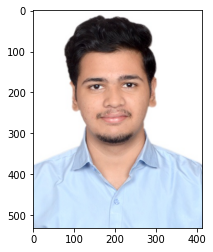

In [ ]:
plt.imshow(img)

#Mapping the 68 facial points on the image 

In [ ]:
faces = face_detector(img, 1)

In [ ]:
len (faces)

1

In [ ]:
faces

rectangles[[(97, 139) (283, 325)]]

In [ ]:
face = faces[0]

In [ ]:
face

rectangle(97,139,283,325)

In [ ]:
landmarks = landmark_detector(img, face)

In [ ]:
base_img = img.copy()
landmarks_tuple = []
for n in range(0, 68):

  x = landmarks.part(n).x
  y = landmarks.part(n).y

      
  landmarks_tuple.append((x, y))

  cv2.circle(base_img, (x, y), 2, (48, 255, 48), -1)

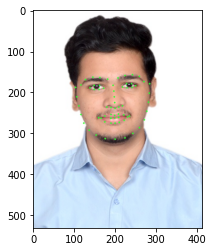

In [ ]:
plt.imshow(base_img)

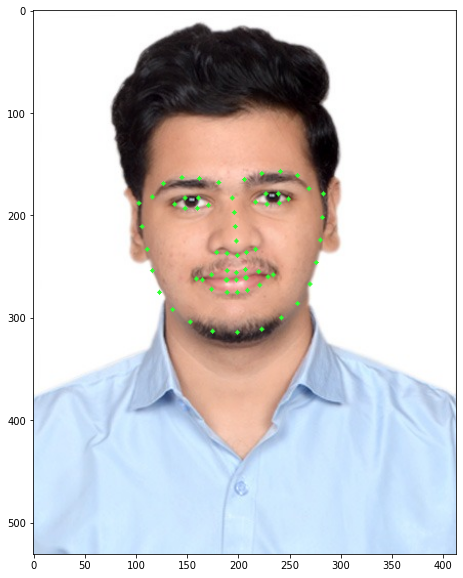

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(base_img)

In [ ]:
route = [i for i in range(16, -1, -1)] + [i for i in range(17,26+1)] +[16]

In [ ]:
route_coordinate = []

In [ ]:
base_img = img.copy()
for i in range(0, len(route) -1):
  source_point = route[i]
  target_point = route[i+1]

  sourse_coordinate = landmarks_tuple[source_point]
  target_coordinate = landmarks_tuple[target_point]

  route_coordinate.append( sourse_coordinate)

  cv2.line(base_img, sourse_coordinate, target_coordinate, (48, 255, 48), 2)


In [ ]:
route_coordinate = route_coordinate + [route_coordinate[0]]

In [ ]:
route_coordinate

[(283, 179),
 (282, 202),
 (280, 224),
 (276, 246),
 (270, 267),
 (258, 286),
 (242, 300),
 (223, 311),
 (199, 314),
 (175, 313),
 (153, 304),
 (136, 292),
 (123, 275),
 (116, 254),
 (111, 233),
 (106, 211),
 (103, 188),
 (116, 182),
 (127, 169),
 (145, 163),
 (162, 164),
 (181, 168),
 (206, 165),
 (223, 159),
 (241, 157),
 (258, 161),
 (269, 174),
 (283, 179)]

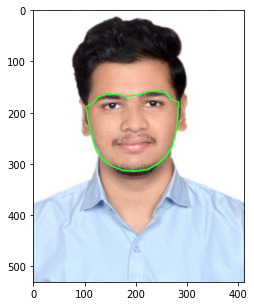

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(base_img)

In [ ]:
mask = np.zeros((img.shape[0], img.shape[1]))

In [ ]:
mask.shape

(531, 413)

In [ ]:
mask = cv2.fillConvexPoly(mask, np.array(route_coordinate), 1)

In [ ]:
mask = mask.astype(np.bool)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
out = np.zeros_like(img)
out[mask] = img[mask]

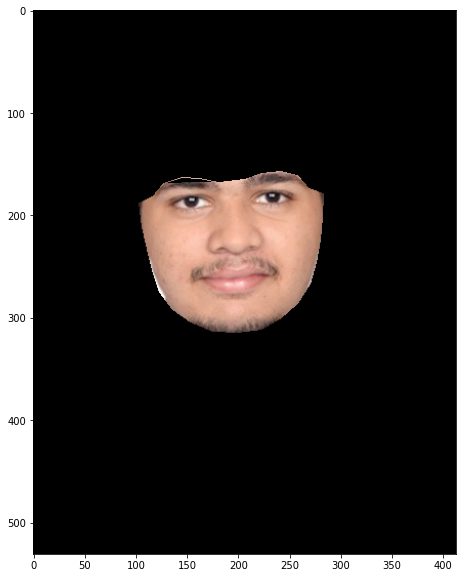

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(out)

In [ ]:
route = [i for i in range(16, -1, -1)] + [i for i in range(17,19)] + [i for i in range(24,26)] +[16]

#Finally Normalize the model

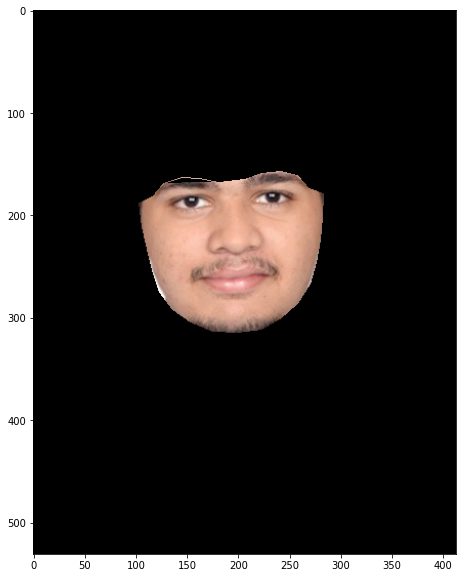

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(out)

###Training the eye detection model by YOLO

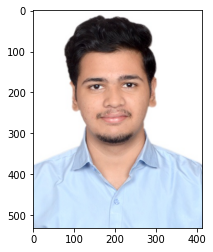

In [ ]:
plt.imshow(img)

In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |█████████████▌                  | 834.1 MB 1.3 MB/s eta 0:15:13tcmalloc: large alloc 1147494400 bytes == 0x64d8a000 @  0x7f1d3e521615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:11:48tcmalloc: large alloc 1434370048 bytes == 0x25b2000 @  0x7f1d3e521615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |█

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14469, done.
remote: Total 14469 (delta 0), reused 0 (delta 0), pack-reused 14469
Receiving objects: 100% (14469/14469), 13.47 MiB | 9.80 MiB/s, done.
Resolving deltas: 100% (9988/9988), done.


In [ ]:
!cd yolov5 & pip install -r ("/content/drive/MyDrive/College work/Miniproject/yolov5-master")

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `cd yolov5 & pip install -r ("/content/drive/MyDrive/College work/Miniproject/yolov5-master")'


In [ ]:
!cd yolov5 & pip install -r ("/content/drive/MyDrive/College work/Miniproject/yolov5-master/yolov5-master/requirements.txt")

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `cd yolov5 & pip install -r ("/content/drive/MyDrive/College work/Miniproject/yolov5-master/yolov5-master/requirements.txt")'


In [ ]:
!pip install -r ("requirements.txt")

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `pip install -r ("requirements.txt")'


In [ ]:
import torch

#Load the Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
requirements: YOLOv5 requirement "ipython" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheel

  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

#Object Detection

In [ ]:
img2 = "/content/drive/MyDrive/College work/Miniproject/Car_Image.jpg"

In [ ]:
results = model(img2)
results.print()

image 1/1: 533x800 28 cars, 5 trucks
Speed: 22.4ms pre-process, 327.2ms inference, 2.6ms NMS per image at shape (1, 3, 448, 640)


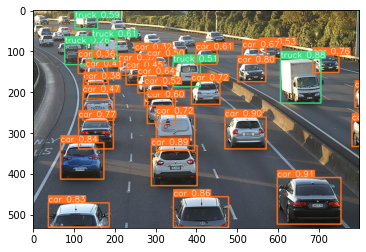

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

[array([[[251, 216, 174],
         [254, 219, 177],
         [246, 213, 168],
         ...,
         [128, 148, 146],
         [ 70,  79,  52],
         [ 64,  71,  29]],
 
        [[235, 201, 156],
         [234, 200, 155],
         [221, 189, 142],
         ...,
         [122, 141, 139],
         [ 85,  91,  65],
         [ 47,  52,  11]],
 
        [[253, 219, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [136, 155, 153],
         [ 69,  73,  46],
         [ 60,  62,  22]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

In [ ]:
np.array(results.render())

array([[[[251, 216, 174],
         [254, 219, 177],
         [246, 213, 168],
         ...,
         [128, 148, 146],
         [ 70,  79,  52],
         [ 64,  71,  29]],

        [[235, 201, 156],
         [234, 200, 155],
         [221, 189, 142],
         ...,
         [122, 141, 139],
         [ 85,  91,  65],
         [ 47,  52,  11]],

        [[253, 219, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [136, 155, 153],
         [ 69,  73,  46],
         [ 60,  62,  22]],

        ...,

        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],

        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],

        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
        

In [ ]:
np.array(results.render()).shape

(1, 533, 800, 3)

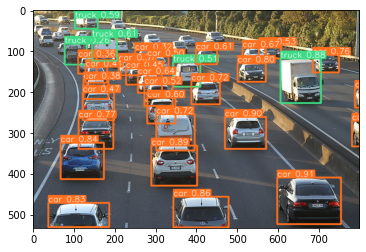

In [ ]:
plt.imshow(np.squeeze(results.render()))

##Train The Model


In [ ]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

In [ ]:
img = os.path.join('data', 'images', '/content/drive/MyDrive/College work/Miniproject/Pratik Mhaske.jpeg')

In [ ]:
results = model(img)

In [ ]:
results.print()

image 1/1: 531x413 1 person
Speed: 302.4ms pre-process, 506.8ms inference, 22.0ms NMS per image at shape (1, 3, 640, 512)


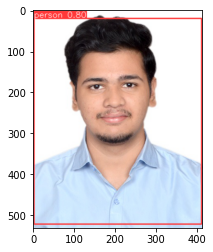

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

##Another project

In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 63.5 MB/s 


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

In [ ]:
mp_facemesh = mp.solutions.face_mesh
mp_drawing  = mp.solutions.drawing_utils
denormalize_coordinates = mp_drawing._normalized_to_pixel_coordinates
 
%matplotlib inline

In [ ]:
# Landmark points corresponding to left eye
all_left_eye_idxs = list(mp_facemesh.FACEMESH_LEFT_EYE)
# flatten and remove duplicates
all_left_eye_idxs = set(np.ravel(all_left_eye_idxs)) 
 
# Landmark points corresponding to right eye
all_right_eye_idxs = list(mp_facemesh.FACEMESH_RIGHT_EYE)
all_right_eye_idxs = set(np.ravel(all_right_eye_idxs))
 
# Combined for plotting - Landmark points for both eye
all_idxs = all_left_eye_idxs.union(all_right_eye_idxs)
 
# The chosen 12 points:   P1,  P2,  P3,  P4,  P5,  P6
chosen_left_eye_idxs  = [362, 385, 387, 263, 373, 380]
chosen_right_eye_idxs = [33,  160, 158, 133, 153, 144]
all_chosen_idxs = chosen_left_eye_idxs + chosen_right_eye_idxs

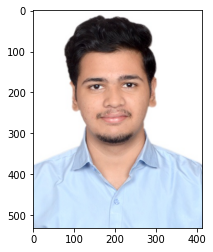

In [ ]:
# load the image
image = cv2.imread(r"/content/drive/MyDrive/College work/Miniproject/Pratik Mhaske.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to RGB
image = np.ascontiguousarray(image)
imgH, imgW, _ = image.shape
 
plt.imshow(image)

In [ ]:
# Running inference using static_image_mode 
with mp_facemesh.FaceMesh(
    static_image_mode=True,         # Default=False
    max_num_faces=1,                # Default=1
    refine_landmarks=False,         # Default=False
    min_detection_confidence=0.5,   # Default=0.5
    min_tracking_confidence= 0.5,   # Default=0.5
) as face_mesh:
     
    results = face_mesh.process(image)
 
# Indicates whether any detections are available or not.
print(bool(results.multi_face_landmarks))

True


In [ ]:
landmark_0 = results.multi_face_landmarks[0].landmark[0]
print(landmark_0)
 
landmark_0_x = landmark_0.x * imgW 
landmark_0_y = landmark_0.y * imgH
landmark_0_z = landmark_0.z * imgW
 
print()
print("X:", landmark_0_x)
print("Y:", landmark_0_y)
print("Z:", landmark_0_z)
 
print()
print("Total Length of '.landmark':", len(results.multi_face_landmarks[0].landmark))


x: 0.48084062337875366
y: 0.4798814356327057
z: -0.0466446615755558


X: 198.58717745542526
Y: 254.81704232096672
Z: -19.264245230704546

Total Length of '.landmark': 468


In [ ]:
x: 0.5087572336196899
y: 0.5726696848869324
z: -0.03815639764070511
 
X: 254.37861680984497
Y: 429.5022636651993
Z: -19.078198820352554
 


In [ ]:
def plot(
    *,
    img_dt,
    img_eye_lmks=None,
    img_eye_lmks_chosen=None,
    face_landmarks=None,
    ts_thickness=1,
    ts_circle_radius=2,
    lmk_circle_radius=3,
    name="1",
):
    # For plotting Face Tessellation
    image_drawing_tool = img_dt 
     
     # For plotting all eye landmarks
    image_eye_lmks = img_dt.copy() if img_eye_lmks is None else img_eye_lmks
     
    # For plotting chosen eye landmarks
    img_eye_lmks_chosen = img_dt.copy() if img_eye_lmks_chosen is None else img_eye_lmks_chosen
 
    # Initializing drawing utilities for plotting face mesh tessellation
    connections_drawing_spec = mp_drawing.DrawingSpec(
        thickness=ts_thickness, 
        circle_radius=ts_circle_radius, 
        color=(255, 255, 255)
    )
 
    # Initialize a matplotlib figure.
    fig = plt.figure(figsize=(20, 15))
    fig.set_facecolor("white")
 
    # Draw landmarks on face using the drawing utilities.
    mp_drawing.draw_landmarks(
        image=image_drawing_tool,
        landmark_list=face_landmarks,
        connections=mp_facemesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=connections_drawing_spec,
    )
 
    # Get the object which holds the x, y, and z coordinates for each landmark
    landmarks = face_landmarks.landmark
 
    # Iterate over all landmarks.
    # If the landmark_idx is present in either all_idxs or all_chosen_idxs,
    # get the denormalized coordinates and plot circles at those coordinates.
 
    for landmark_idx, landmark in enumerate(landmarks):
        if landmark_idx in all_idxs:
            pred_cord = denormalize_coordinates(landmark.x, 
                                                landmark.y, 
                                                imgW, imgH)
            cv2.circle(image_eye_lmks, 
                       pred_cord, 
                       lmk_circle_radius, 
                       (255, 255, 255), 
                       -1
                       )
 
        if landmark_idx in all_chosen_idxs:
            pred_cord = denormalize_coordinates(landmark.x, 
                                                landmark.y, 
                                                imgW, imgH)
            cv2.circle(img_eye_lmks_chosen, 
                       pred_cord, 
                       lmk_circle_radius, 
                       (255, 255, 255), 
                       -1
                       )
 
    # Plot post-processed images
    plt.subplot(1, 3, 1)
    plt.title("Face Mesh Tessellation", fontsize=18)
    plt.imshow(image_drawing_tool)
    plt.axis("off")
 
    plt.subplot(1, 3, 2)
    plt.title("All eye landmarks", fontsize=18)
    plt.imshow(image_eye_lmks)
    plt.axis("off")
 
    plt.subplot(1, 3, 3)
    plt.imshow(img_eye_lmks_chosen)
    plt.title("Chosen landmarks", fontsize=18)
    plt.axis("off")
    plt.show()
    plt.close()
    return

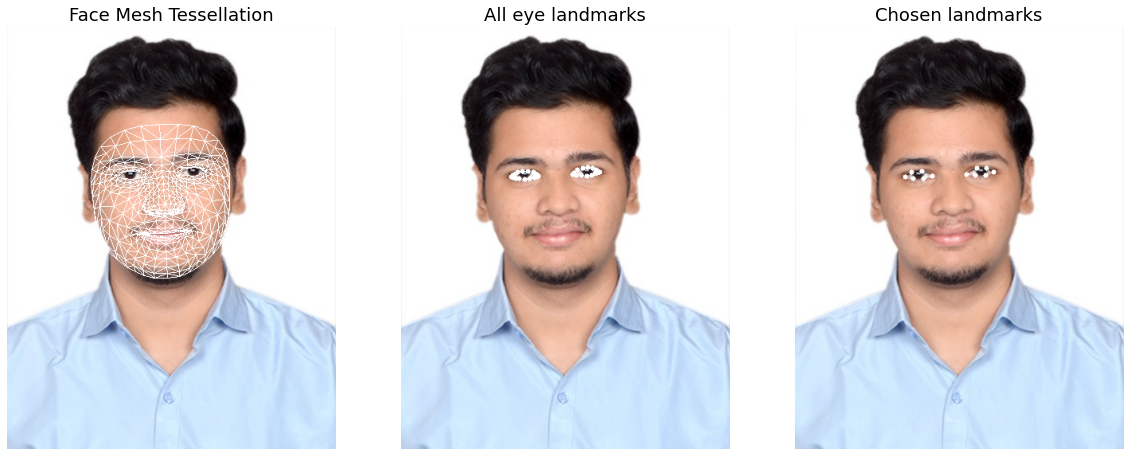

In [ ]:
# If detections are available.
if results.multi_face_landmarks:
     
    # Iterate over detections of each face. Here, we have max_num_faces=1, 
    # So there will be at most 1 element in 
    # the 'results.multi_face_landmarks' list            
    # Only one iteration is performed.
 
    for face_id, face_landmarks in enumerate(results.multi_face_landmarks):    
        _ = plot(img_dt=image.copy(), face_landmarks=face_landmarks)

In [ ]:
def distance(point_1, point_2):
    """Calculate l2-norm between two points"""
    dist = sum([(i - j) ** 2 for i, j in zip(point_1, point_2)]) ** 0.5
    return dist

In [ ]:
def get_ear(landmarks, refer_idxs, frame_width, frame_height):
    """
    Calculate Eye Aspect Ratio for one eye.
 
    Args:
        landmarks: (list) Detected landmarks list
        refer_idxs: (list) Index positions of the chosen landmarks
                            in order P1, P2, P3, P4, P5, P6
        frame_width: (int) Width of captured frame
        frame_height: (int) Height of captured frame
 
    Returns:
        ear: (float) Eye aspect ratio
    """
    try:
        # Compute the euclidean distance between the horizontal
        coords_points = []
        for i in refer_idxs:
            lm = landmarks[i]
            coord = denormalize_coordinates(lm.x, lm.y, 
                                             frame_width, frame_height)
            coords_points.append(coord)
 
        # Eye landmark (x, y)-coordinates
        P2_P6 = distance(coords_points[1], coords_points[5])
        P3_P5 = distance(coords_points[2], coords_points[4])
        P1_P4 = distance(coords_points[0], coords_points[3])
 
        # Compute the eye aspect ratio
        ear = (P2_P6 + P3_P5) / (2.0 * P1_P4)
 
    except:
        ear = 0.0
        coords_points = None
 
    return ear, coords_points

In [ ]:
def calculate_avg_ear(landmarks, left_eye_idxs, right_eye_idxs, image_w, image_h):
    """Calculate Eye aspect ratio"""
 
    left_ear, left_lm_coordinates = get_ear(
                                      landmarks, 
                                      left_eye_idxs, 
                                      image_w, 
                                      image_h
                                    )
    right_ear, right_lm_coordinates = get_ear(
                                      landmarks, 
                                      right_eye_idxs, 
                                      image_w, 
                                      image_h
                                    )
    Avg_EAR = (left_ear + right_ear) / 2.0
 
    return Avg_EAR, (left_lm_coordinates, right_lm_coordinates)

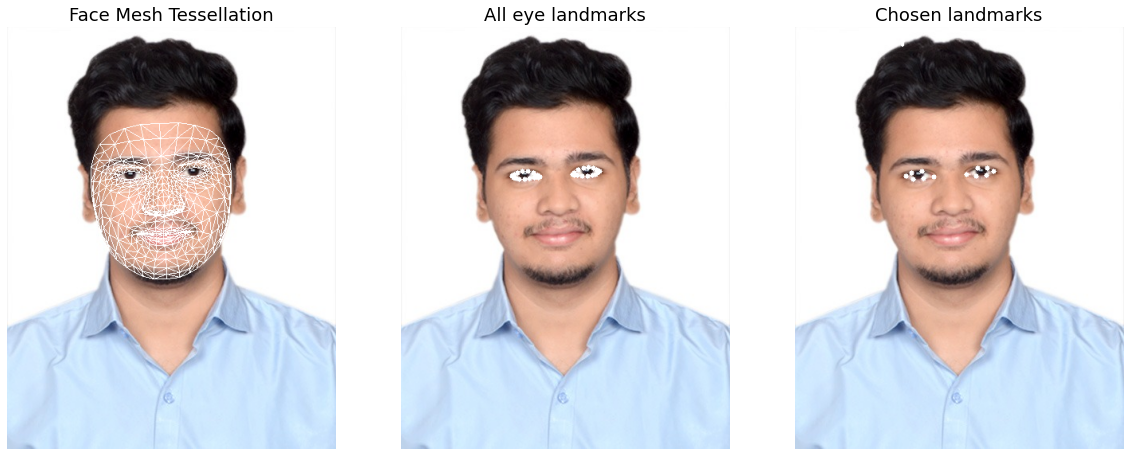

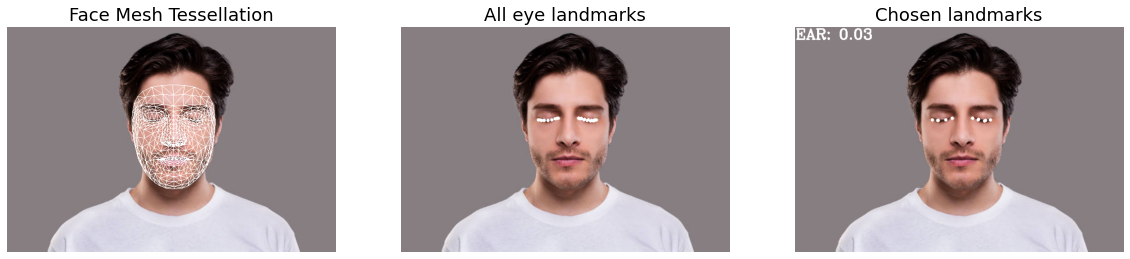

In [ ]:
image_eyes_open  = cv2.imread("/content/drive/MyDrive/College work/Miniproject/Pratik Mhaske.jpeg")[:, :, ::-1]
image_eyes_close = cv2.imread("/content/drive/MyDrive/College work/Miniproject/Closed image.jpg")[:, :, ::-1]
 
for idx, image in enumerate([image_eyes_open, image_eyes_close]):
    
    image = np.ascontiguousarray(image)
    imgH, imgW, _ = image.shape
 
    # Creating a copy of the original image for plotting the EAR value
    custom_chosen_lmk_image = image.copy()
 
    # Running inference using static_image_mode
    with mp_facemesh.FaceMesh(refine_landmarks=True) as face_mesh:
        results = face_mesh.process(image).multi_face_landmarks
 
        # If detections are available.
        if results:
            for face_id, face_landmarks in enumerate(results):
                landmarks = face_landmarks.landmark
                EAR, _ = calculate_avg_ear(
                          landmarks, 
                          chosen_left_eye_idxs, 
                          chosen_right_eye_idxs, 
                          imgW, 
                          imgH
                      )
 
                # Print the EAR value on the custom_chosen_lmk_image.
                cv2.putText(custom_chosen_lmk_image, 
                            f"EAR: {round(EAR, 2)}", (1, 24),
                            cv2.FONT_HERSHEY_COMPLEX, 
                            0.9, (255, 255, 255), 2
                )                
              
                plot(img_dt=image.copy(),
                     img_eye_lmks_chosen=custom_chosen_lmk_image,
                     face_landmarks=face_landmarks,
                     ts_thickness=1, 
                     ts_circle_radius=3, 
                     lmk_circle_radius=3
                )